# Proyek Analisis Data: Changzing Air Quality Index
- **Nama:** Ahmad Bintang Arif
- **Email:** ahmadbintang002@gmail.com
- **ID Dicoding:** abin282

## Menentukan Pertanyaan Bisnis

- Bagaimana tren tahunan rata-rata konsentrasi PM2.5 di stasiun Changping dari tahun 2013 hingga 2017, dan apakah terdapat perbaikan kualitas udara selama periode tersebut?
- Bagaimana konsentrasi Ozon (O3) setiap bulan di stasiun Changping selama periode 2013–2017?
- Seberapa kuat hubungan antara suhu udara (TEMP) dan konsentrasi ozon (O3) di stasiun Changping selama 2013–2017?


## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

Tahapan ini berupa pengumpulan data dan mencari informasi terkait deskripsi ataupun karakterisik data secara umum

In [2]:
# Import data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DICODING/Belajar Analisis Data dengan Python/Air Quality Data_Changping.csv')
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,28.0,47.0,4.0,14.0,300.0,NaN,11.7,1008.9,-13.3,0.0,NNE,1.3,Changping
35060,35061,2017,2,28,20,12.0,12.0,3.0,23.0,500.0,64.0,10.9,1009.0,-14.0,0.0,N,2.1,Changping
35061,35062,2017,2,28,21,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,N,1.5,Changping
35062,35063,2017,2,28,22,11.0,20.0,3.0,15.0,500.0,72.0,7.8,1009.6,-12.6,0.0,NW,1.4,Changping


In [13]:
# Melihat informasi umum dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


**Intro**

Data ini merupakan dataset kualitas udara pada wilayah Changping, Beijing (Tiongkok)
Sumber : [Air Quality Dataset](https://github.com/marceloreis/HTI/tree/master/PRSA_Data_20130301-20170228)

Dataset ini merupakan dataset terkait kualitas udara yang disertai dengan informasi waktu, polutan dan faktor iklim. Untuk memahami karakteristik data, berikut adalah deskripsi data yang dikumpulkan dari beberapa sumber.

| Nama Kolom | Deskripsi |
|------------|-----------|
| `No`       | Nomor urut data (indeks baris)|
| `year`     | Tahun pengambilan data pengukuran |
| `month`    | Bulan pengambilan data (1–12)|
| `day`      | Tanggal pengambilan data. |
| `hour`     | Jam pengambilan data (0–23, format 24 jam)|
| `PM2.5`    | Konsentrasi partikel debu halus (≤2.5 mikron) dalam udara, diukur dalam µg/m³|
| `PM10`     | Konsentrasi partikel debu kasar (≤10 mikron) dalam udara, diukur dalam µg/m³|
| `SO2`      | Konsentrasi sulfur dioksida (SO₂) dalam udara, diukur dalam µg/m³|
| `NO2`      | Konsentrasi nitrogen dioksida (NO₂) dalam udara, diukur dalam µg/m³|
| `CO`       | Konsentrasi karbon monoksida (CO) dalam udara, diukur dalam µg/m³|
| `O3`       | Konsentrasi ozon (O₃) dalam udara, diukur dalam µg/m³|
| `TEMP`     | Suhu udara saat pengukuran, dalam derajat Celsius (°C)|
| `PRES`     | Tekanan udara atmosfer saat pengukuran, dalam hPa (hektopascal) |
| `DEWP`     | Titik embun (dew point), yaitu suhu di mana udara mulai mengembun, dalam °C |
| `RAIN`     | Curah hujan saat pengukuran, dalam mm|
| `wd`       | Arah angin saat pengukuran (misalnya: N, NE, E, SE, S, SW, W, NW)|
| `WSPM`     | Kecepatan angin saat pengukuran, dalam meter per detik (m/s)|
| `station`  | Nama stasiun pemantauan kualitas udara ("Changping")|


**Insight**
- Dataset ini berisikan 35064 entries kondisi udara di Changping, Tiongkok dalam rentang waktu 2013 hingga 2017.
- Dataset ini memiliki 18 kolom mulai dari index hingga stasiun cuaca (Changping)
- Data ini memiliki informasi waktu yang detail karena mulai dari jam, hari, bulan dan tahun.
- Faktor cuaca dapat mempengaruhi kualitas udara [referensi](https://scied.ucar.edu/learning-zone/air-quality/how-weather-affects-air-quality)


### Assessing Data

Tahapan ini bertujuan untuk mengidentifikasi masalah yang terdapat dalam data dan memastikan data tersebut berkualitas.
Berikut beberapa masalah yang dapat diidentifikasi
- Missing value
- Data duplikat
- Outlier
- Inkonsistensi


In [ ]:
#1 Melihat summary keseluruhan dari dataset
df.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,34924,35021.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NNW,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4776,NaN
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,NaN,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,NaN,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,NaN,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,NaN,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,NaN,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,NaN,2.300000


In [ ]:
#2 Mencari NA
# Memeriksa jumlah nilai yang hilang di setiap kolom
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0
PM2.5,774
PM10,582
SO2,628
NO2,667
CO,1521
O3,604
TEMP,53
PRES,50
DEWP,53
RAIN,51


In [ ]:
#3 Mencari data duplikat
df.duplicated().sum()

np.int64(0)

====BOXPLOT====


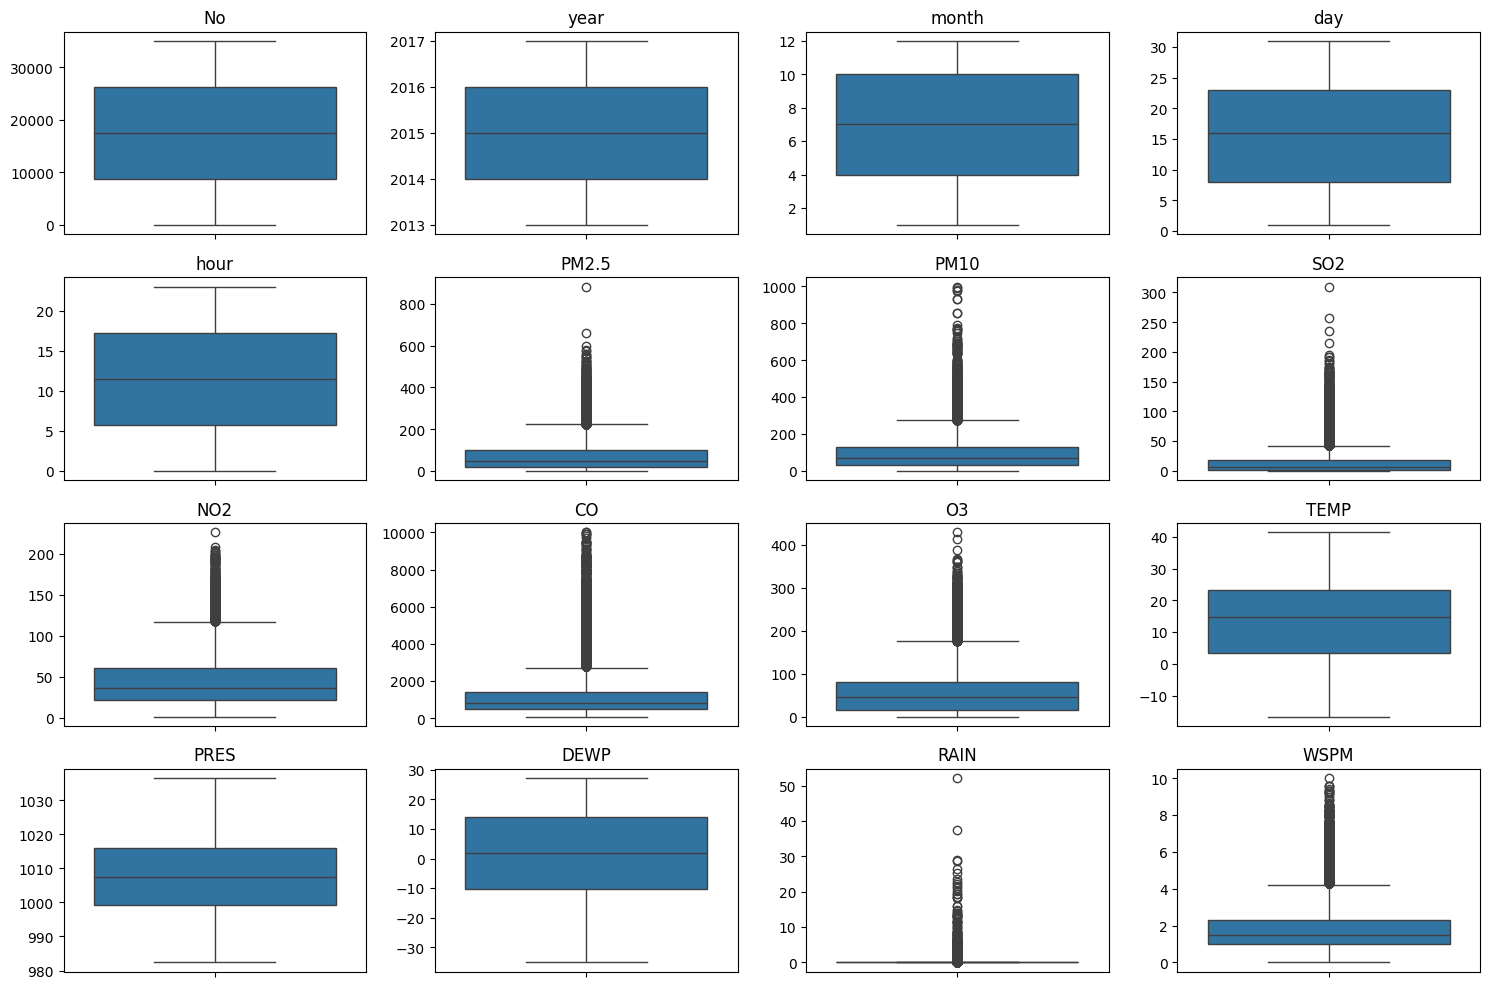

====JUMLAH OUTLIERS====
Jumlah outlier tiap kolom:
PM2.5: 1674
PM10: 1313
SO2: 3136
NO2: 799
CO: 2590
O3: 1612
RAIN: 1350
WSPM: 2382


In [3]:
##4.1 Mencari outliers dengan boxplot
# Memilih kolom numerik
def visual_boxplot(df):
  numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
  # Membuat boxplot kolom numerik tersebut
  plt.figure(figsize=(15, 10))
  print("====BOXPLOT====")
  for i, col in enumerate(numerical_cols):
      plt.subplot(4, 4, i + 1)
      sns.boxplot(y=df[col])
      plt.title(col)
      plt.ylabel('')
  plt.tight_layout()
  plt.show()

visual_boxplot(df)
## 4.2 Mencari outliers dengan hitungan
def count_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

# Kolom dengan outlier
outlier_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'RAIN', 'WSPM']

print("====JUMLAH OUTLIERS====")
print("Jumlah outlier tiap kolom:")
for col in outlier_columns:
    if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
        num_outliers = count_outliers(df, col)
        print(f"{col}: {num_outliers}")

In [ ]:
#5 Mengecek nilai unique setiap kolom
df.nunique()

,0
No,35064
year,5
month,12
day,31
hour,24
PM2.5,481
PM10,562
SO2,294
NO2,459
CO,115


In [ ]:
#6 Mengecek unique value kolom kategorik
# Cek kolom dengan tipe data object
object_cols = df.select_dtypes(include='object').columns

# Looping kolom dan lihat unique valuenya
for col in object_cols:
    print(f"Unique values '{col}':")
    print(df[col].unique())
    print("-" * 30)

Unique values 'wd':
['E' 'ENE' 'NNE' 'N' 'NNW' 'NW' 'NE' 'SW' 'SSW' 'WSW' 'ESE' 'SE' 'S' 'WNW'
 'SSE' 'W' nan]
------------------------------


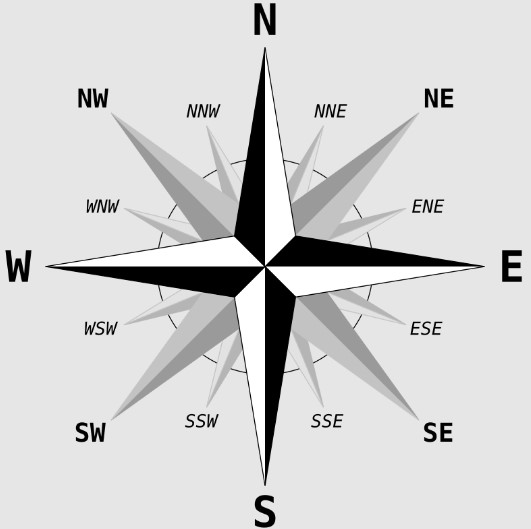

**Insight:**

1# Summary Data
- Tahun mulai dari 2013-2017
- Bulan terdiri dari Jan-Des
- Jam mulai dari 0 - 24
- Hari mulai tanggal 1 - 31
- MAX PM2.5 dan PM10 sangat besar, terindikasi outlier

2# Missing Value
- 'PM2.5',
 'PM10',
 'SO2',
 'NO2',
 'CO',
 'O3',
 'TEMP',
 'PRES',
 'DEWP',
 'RAIN',
 'wd',
 'WSPM' adalah kolom yang memiliki missing value
- CO memiliki NA paling banyak 1521 namun masih sedikit secara keseluruhan karena hanya 4% dari data (1521 dari 35064 data)

3# Duplikat
- Dataset ini tidak memiliki data duplikat

4# Outlier
- PM2.5, PM10, SO2, NO2, CO, O3, RAIN, WSPM memiliki outliers berdasarkan boxplot
- Kolom dengan outlier terbanyak adalah SO2 (3136 dari 35064 data) atau setara dengan 8% data

5# Unique value
Kolom yang unique valuenya bermakna adalah
- Year : 5 tahun (2013-2017)
- Month : 12 bulan (1-12)
- Hours : 24 jam (0-23)
- Day : 31 hari
- WD : arah mata angin
- station : hanya changping
Selain itu, kolomnya bertipe numerik yang dicek menggunakan distribusi



### Cleaning Data

#### 1 Kolom tidak penting


In [4]:
df.drop(columns=['station'], inplace=True)

#### 2 Missing Value

In [5]:
#2 Menghapus Missing value
df_clean = df.dropna()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32681 entries, 0 to 35063
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      32681 non-null  int64  
 1   year    32681 non-null  int64  
 2   month   32681 non-null  int64  
 3   day     32681 non-null  int64  
 4   hour    32681 non-null  int64  
 5   PM2.5   32681 non-null  float64
 6   PM10    32681 non-null  float64
 7   SO2     32681 non-null  float64
 8   NO2     32681 non-null  float64
 9   CO      32681 non-null  float64
 10  O3      32681 non-null  float64
 11  TEMP    32681 non-null  float64
 12  PRES    32681 non-null  float64
 13  DEWP    32681 non-null  float64
 14  RAIN    32681 non-null  float64
 15  wd      32681 non-null  object 
 16  WSPM    32681 non-null  float64
dtypes: float64(11), int64(5), object(1)
memory usage: 4.5+ MB


In [6]:
print("Data awal : 35064")
print(f"Data setelah dropna :{df_clean.shape[0]}")
print(f"Data yang dihapus : {35064 - df_clean.shape[0]}")
print(f"Persentase data yang dihapus : {((35064 - df_clean.shape[0]) / 35064 * 100):.2f}%")

Data awal : 35064
Data setelah dropna :32681
Data yang dihapus : 2383
Persentase data yang dihapus : 6.80%


#### 3 Outlier

##### Hapus outlier

In [7]:
#2 Memilih data tanpa outlier
def filter_outlier(df):
  numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
  Q1 = df[numeric_features].quantile(0.25)
  Q3 = df[numeric_features].quantile(0.75)
  IQR = Q3 - Q1
  # Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
  condition = ~((df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)
  df_filtered_numeric = df.loc[condition, numeric_features]

  # Menggabungkan kembali dengan kolom kategorikal
  categorical_features = df.select_dtypes(include=['object']).columns
  df = pd.concat([df_filtered_numeric, df.loc[condition, categorical_features]], axis=1)
  return df

====BOXPLOT====


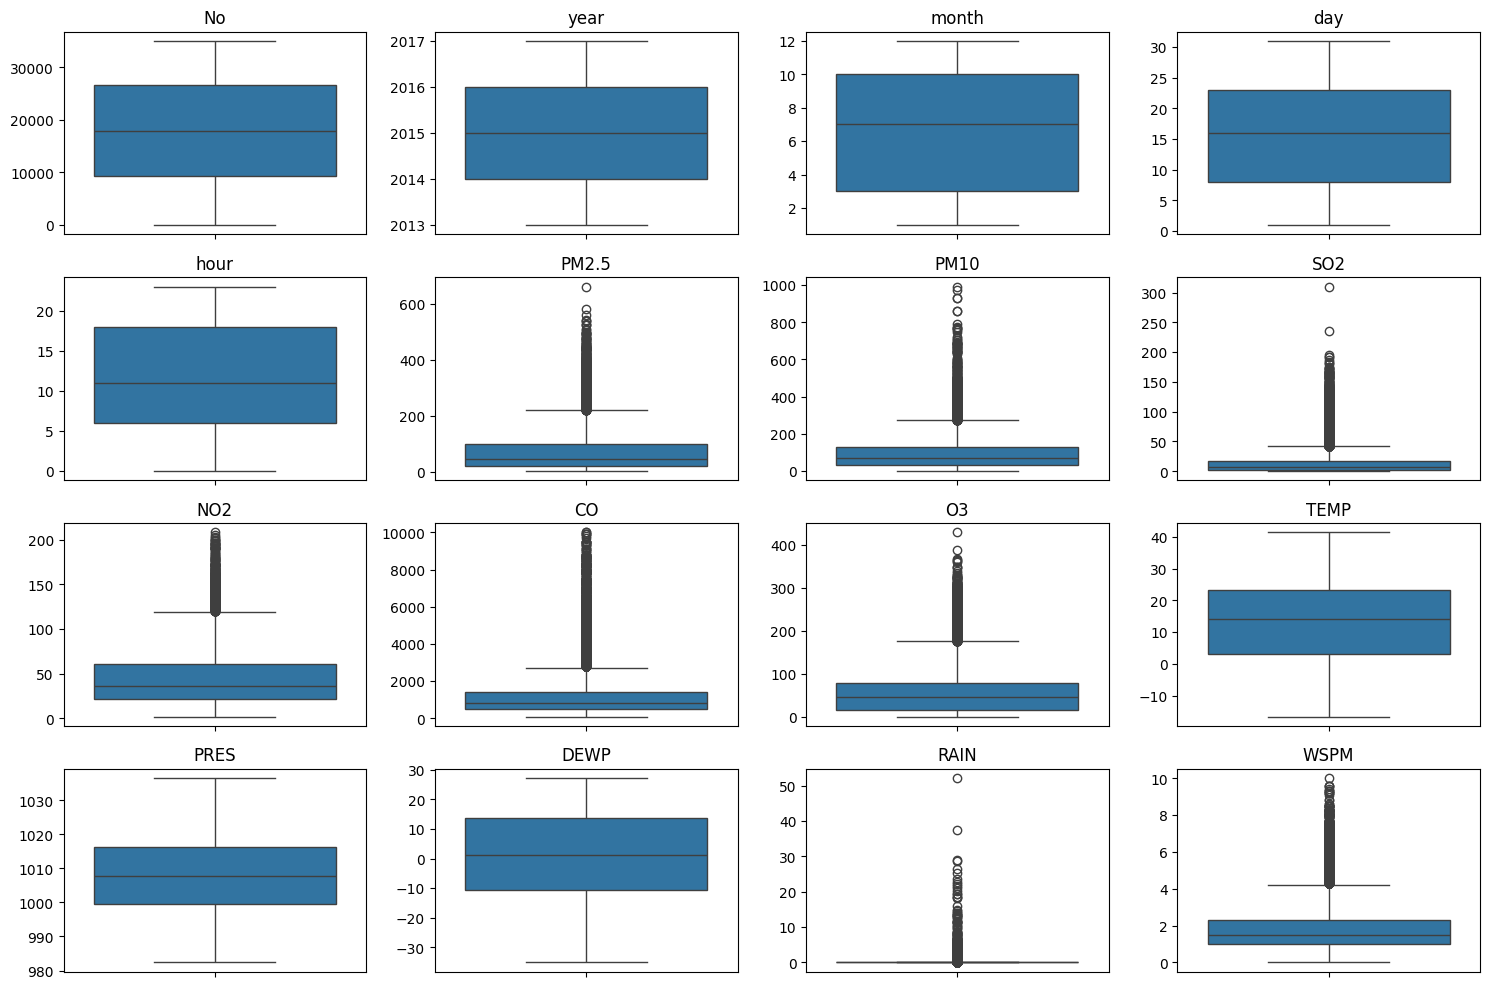

In [8]:
# Boxplot sebelum filtering
visual_boxplot(df_clean)

====BOXPLOT====


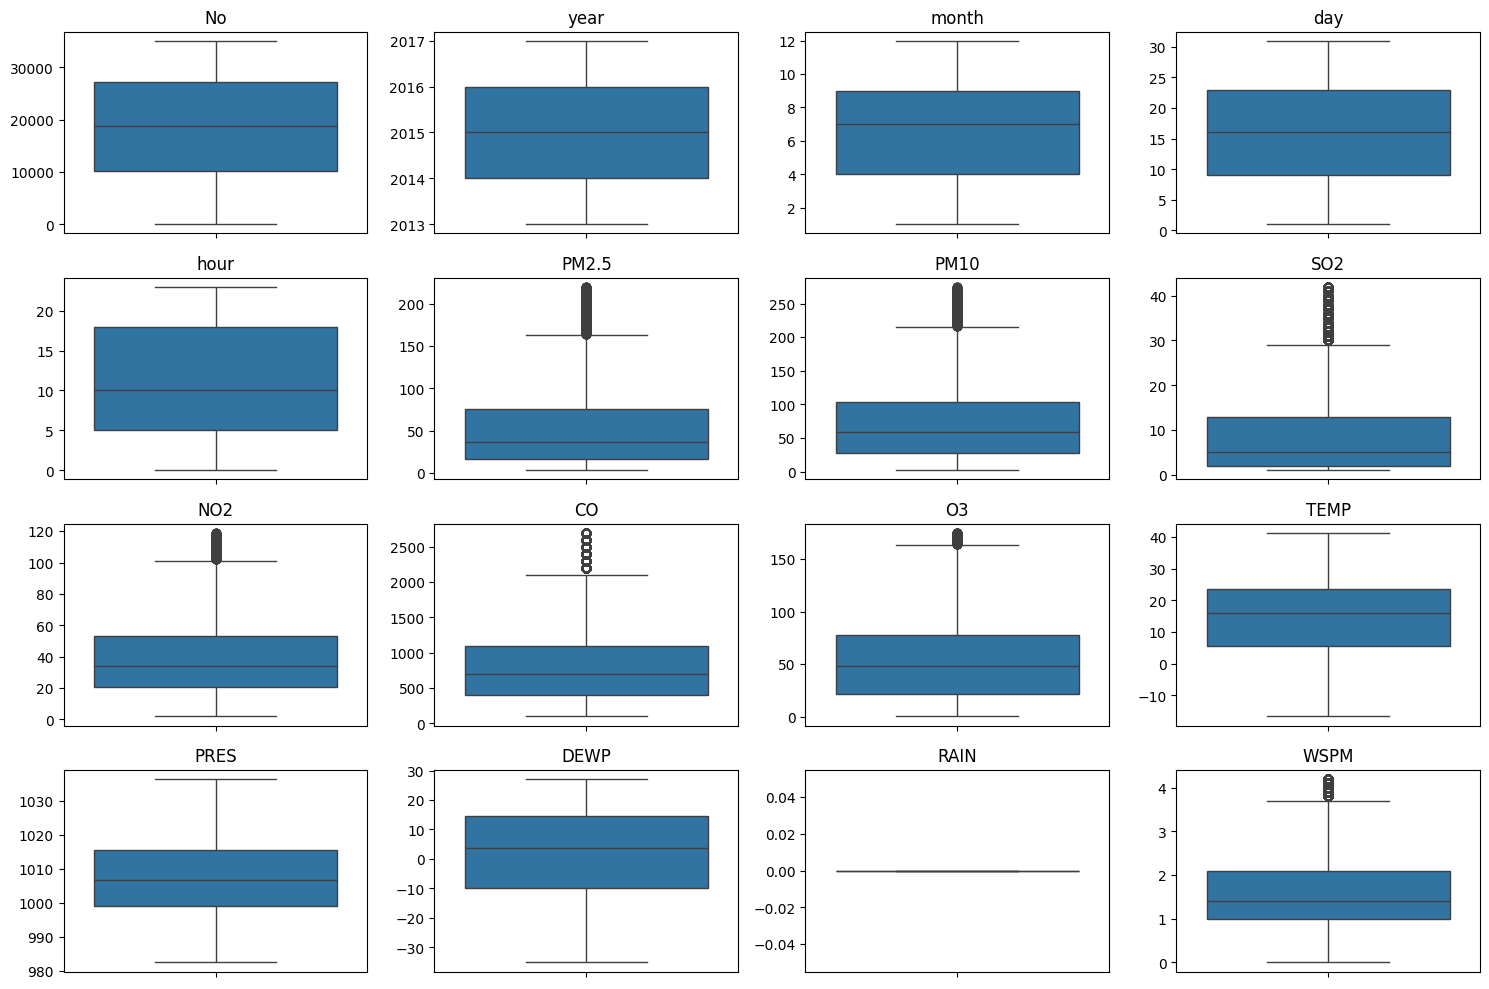

In [9]:
# Boxplot sesudah filtering
df_filtered = filter_outlier(df_clean)
visual_boxplot(df_filtered)

##### Mengisi data outlier dengan rentang data terdekat (capping)

In [10]:
# Daftar kolom numerik yang ingin ditangani outlier-nya
cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN','WSPM']

# Loop setiap kolom
for col in cols:
    Q1 = df_filtered[col].quantile(0.25)
    Q3 = df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping nilai yang di luar batas
    df_filtered[col] = df_filtered[col].apply(
        lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
    )


====BOXPLOT====


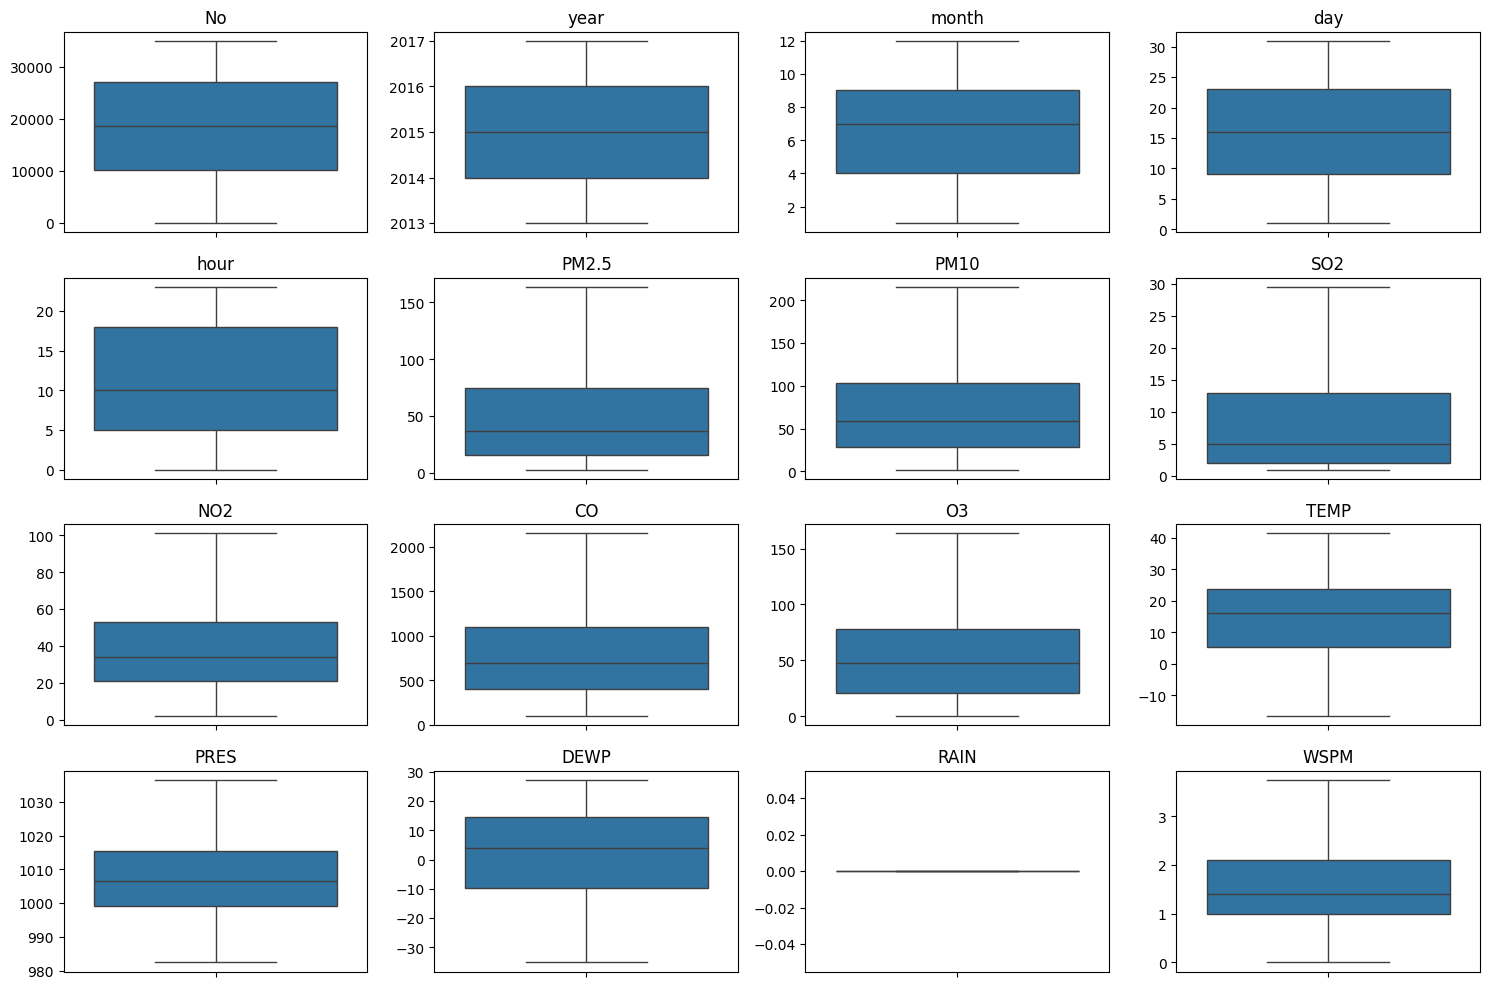

In [11]:
visual_boxplot(df_filtered)

In [12]:
print("Data awal : 35064")
print(f"Data setelah filtering :{df_filtered.shape[0]}")
print(f"Data yang dihapus : {35064 - df_filtered.shape[0]}")
print(f"Persentase data yang dihapus : {((35064 - df_filtered.shape[0]) / 35064 * 100):.2f}%")

Data awal : 35064
Data setelah filtering :22820
Data yang dihapus : 12244
Persentase data yang dihapus : 34.92%


In [13]:
df_filtered.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,22820.000000,22820.000000,22820.000000,22820.000000,22820.000000,22820.000000,22820.000000,22820.000000,22820.000000,22820.000000,22820.000000,22820.000000,22820.000000,22820.000000,22820.0,22820.000000
mean,18218.985320,2014.731639,6.629623,15.910210,11.053155,50.811529,71.145762,8.922949,38.945276,831.269982,54.394287,14.569909,1007.403623,2.303120,0.0,1.626496
std,9999.384446,1.170667,3.237002,8.702168,7.176356,43.228960,51.856798,8.625346,22.550995,507.246152,40.830787,10.864906,10.078426,13.750331,0.0,0.883311
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.0,0.000000
25%,10203.750000,2014.000000,4.000000,9.000000,5.000000,16.000000,28.000000,2.000000,21.000000,400.000000,21.000000,5.475000,999.100000,-9.700000,0.0,1.000000
50%,18752.500000,2015.000000,7.000000,16.000000,10.000000,37.000000,59.000000,5.000000,34.000000,700.000000,48.000000,16.200000,1006.600000,3.800000,0.0,1.400000
75%,27093.250000,2016.000000,9.000000,23.000000,18.000000,75.000000,103.000000,13.000000,53.000000,1100.000000,78.000000,23.600000,1015.500000,14.600000,0.0,2.100000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,163.500000,215.500000,29.500000,101.000000,2150.000000,163.500000,41.400000,1036.500000,27.200000,0.0,3.750000


##### Insight

**Insight:**
- Sebanyak 6.8% missing value telah dihapus
- Mengatasi outlier dilakukan dengan 2 cara, yaitu hapus dan capping
- Filtering outlier membuang 34.92% data
- Data setelah filtering outlier menjadi 22820

## Exploratory Data Analysis (EDA)

### Statistika Deskriptif

In [ ]:
df_filtered

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,wd
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,0.50,E
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,0.70,ENE
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,0.20,ENE
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,1.00,NNE
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,2.10,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35057,35058,2017,2,28,17,18.0,61.0,6.0,29.0,400.0,51.0,14.7,1007.4,-12.6,0.0,3.75,WNW
35060,35061,2017,2,28,20,12.0,12.0,3.0,23.0,500.0,64.0,10.9,1009.0,-14.0,0.0,2.10,N
35061,35062,2017,2,28,21,7.0,23.0,5.0,17.0,500.0,68.0,9.5,1009.4,-13.0,0.0,1.50,N
35062,35063,2017,2,28,22,11.0,20.0,3.0,15.0,500.0,72.0,7.8,1009.6,-12.6,0.0,1.40,NW


In [ ]:
# Mengecek informasi umum data terfilter
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22820 entries, 0 to 35063
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      22820 non-null  int64  
 1   year    22820 non-null  int64  
 2   month   22820 non-null  int64  
 3   day     22820 non-null  int64  
 4   hour    22820 non-null  int64  
 5   PM2.5   22820 non-null  float64
 6   PM10    22820 non-null  float64
 7   SO2     22820 non-null  float64
 8   NO2     22820 non-null  float64
 9   CO      22820 non-null  float64
 10  O3      22820 non-null  float64
 11  TEMP    22820 non-null  float64
 12  PRES    22820 non-null  float64
 13  DEWP    22820 non-null  float64
 14  RAIN    22820 non-null  float64
 15  WSPM    22820 non-null  float64
 16  wd      22820 non-null  object 
dtypes: float64(11), int64(5), object(1)
memory usage: 3.1+ MB


In [ ]:
# Mengecek summary data terfilter
df_filtered.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,22820.000000,22820.000000,22820.000000,22820.000000,22820.000000,22820.000000,22820.000000,22820.000000,22820.000000,22820.000000,22820.000000,22820.000000,22820.000000,22820.000000,22820.0,22820.000000
mean,18218.985320,2014.731639,6.629623,15.910210,11.053155,50.811529,71.145762,8.922949,38.945276,831.269982,54.394287,14.569909,1007.403623,2.303120,0.0,1.626496
std,9999.384446,1.170667,3.237002,8.702168,7.176356,43.228960,51.856798,8.625346,22.550995,507.246152,40.830787,10.864906,10.078426,13.750331,0.0,0.883311
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.0,0.000000
25%,10203.750000,2014.000000,4.000000,9.000000,5.000000,16.000000,28.000000,2.000000,21.000000,400.000000,21.000000,5.475000,999.100000,-9.700000,0.0,1.000000
50%,18752.500000,2015.000000,7.000000,16.000000,10.000000,37.000000,59.000000,5.000000,34.000000,700.000000,48.000000,16.200000,1006.600000,3.800000,0.0,1.400000
75%,27093.250000,2016.000000,9.000000,23.000000,18.000000,75.000000,103.000000,13.000000,53.000000,1100.000000,78.000000,23.600000,1015.500000,14.600000,0.0,2.100000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,163.500000,215.500000,29.500000,101.000000,2150.000000,163.500000,41.400000,1036.500000,27.200000,0.0,3.750000


In [ ]:
# Distribusi jumlah data setiap tahun
print("Frekuensi data setiap tahun")
df['year'].value_counts().sort_index()

Frekuensi data setiap tahun


,count
year,
2013,7344
2014,8760
2015,8760
2016,8784
2017,1416


In [ ]:
# Distribusi jumlah data setiap bulan
print("Frekuensi data setiap bulan")
df['month'].value_counts().sort_index()

Frekuensi data setiap bulan


,count
month,
1,2976
2,2712
3,2976
4,2880
5,2976
6,2880
7,2976
8,2976
9,2880


### Measuring Central

In [ ]:
polutan = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
mean = df_filtered[polutan].mean()
median = df_filtered[polutan].median()
modus = df_filtered[polutan].mode().iloc[0]

summary_table = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Modus': modus
})

print("Summary setiap polutan")
summary_table


Summary setiap polutan


,Mean,Median,Modus
PM2.5,50.811529,37.0,163.5
PM10,71.145762,59.0,215.5
SO2,8.922949,5.0,2.0
NO2,38.945276,34.0,20.0
CO,831.269982,700.0,500.0
O3,54.394287,48.0,2.0


In [ ]:
cuaca = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
mean = df_filtered[cuaca].mean()
median = df_filtered[cuaca].median()
modus = df_filtered[cuaca].mode().iloc[0]

summary_table = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Modus': modus
})

print("Summary setiap faktor cuaca")
summary_table


Summary setiap faktor cuaca


,Mean,Median,Modus
TEMP,14.569909,16.2,3.0
PRES,1007.403623,1006.6,1021.0
DEWP,2.303120,3.8,16.6
RAIN,0.000000,0.0,0.0
WSPM,1.626496,1.4,1.1


### Measuring Dispersion

In [ ]:
polutan = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
range = df_filtered[polutan].max() - df_filtered[polutan].min()
iqr = df_filtered[polutan].quantile(0.75) - df_filtered[polutan].quantile(0.25)
stdev = df_filtered[polutan].std()
var = df_filtered[polutan].var()

summary_table = pd.DataFrame({
    'Range': range,
    'IQR': iqr,
    'STDEV': stdev,
    'VAR': var
})


print("Summary setiap polutan")
summary_table


Summary setiap polutan


,Range,IQR,STDEV,VAR
PM2.5,160.5000,59.0,43.228960,1868.742960
PM10,213.5000,75.0,51.856798,2689.127453
SO2,28.5000,11.0,8.625346,74.396594
NO2,99.0000,32.0,22.550995,508.547356
CO,2050.0000,700.0,507.246152,257298.659172
O3,163.2858,57.0,40.830787,1667.153180


In [ ]:
cuaca = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
range = df_filtered[cuaca].max() - df_filtered[cuaca].min()
iqr = df_filtered[cuaca].quantile(0.75) - df_filtered[cuaca].quantile(0.25)
stdev = df_filtered[cuaca].std()
var = df_filtered[cuaca].var()

summary_table = pd.DataFrame({
    'Range': range,
    'IQR': iqr,
    'STDEV': stdev,
    'VAR': var
})

print("Summary setiap faktor cuaca")
summary_table


Summary setiap faktor cuaca


,Range,IQR,STDEV,VAR
TEMP,58.00,18.125,10.864906,118.046182
PRES,54.10,16.400,10.078426,101.574673
DEWP,62.30,24.300,13.750331,189.071589
RAIN,0.00,0.000,0.000000,0.000000
WSPM,3.75,1.100,0.883311,0.780239


### Measuring Asymmetric

In [15]:
df_filtered.to_csv('filtered_data.csv')

In [19]:
df_filtered.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,22820.000000,22820.000000,22820.000000,22820.000000,22820.000000,22820.000000,22820.000000,22820.000000,22820.000000,22820.000000,22820.000000,22820.000000,22820.000000,22820.000000,22820.0,22820.000000
mean,18218.985320,2014.731639,6.629623,15.910210,11.053155,50.811529,71.145762,8.922949,38.945276,831.269982,54.394287,14.569909,1007.403623,2.303120,0.0,1.626496
std,9999.384446,1.170667,3.237002,8.702168,7.176356,43.228960,51.856798,8.625346,22.550995,507.246152,40.830787,10.864906,10.078426,13.750331,0.0,0.883311
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.0,0.000000
25%,10203.750000,2014.000000,4.000000,9.000000,5.000000,16.000000,28.000000,2.000000,21.000000,400.000000,21.000000,5.475000,999.100000,-9.700000,0.0,1.000000
50%,18752.500000,2015.000000,7.000000,16.000000,10.000000,37.000000,59.000000,5.000000,34.000000,700.000000,48.000000,16.200000,1006.600000,3.800000,0.0,1.400000
75%,27093.250000,2016.000000,9.000000,23.000000,18.000000,75.000000,103.000000,13.000000,53.000000,1100.000000,78.000000,23.600000,1015.500000,14.600000,0.0,2.100000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,163.500000,215.500000,29.500000,101.000000,2150.000000,163.500000,41.400000,1036.500000,27.200000,0.0,3.750000


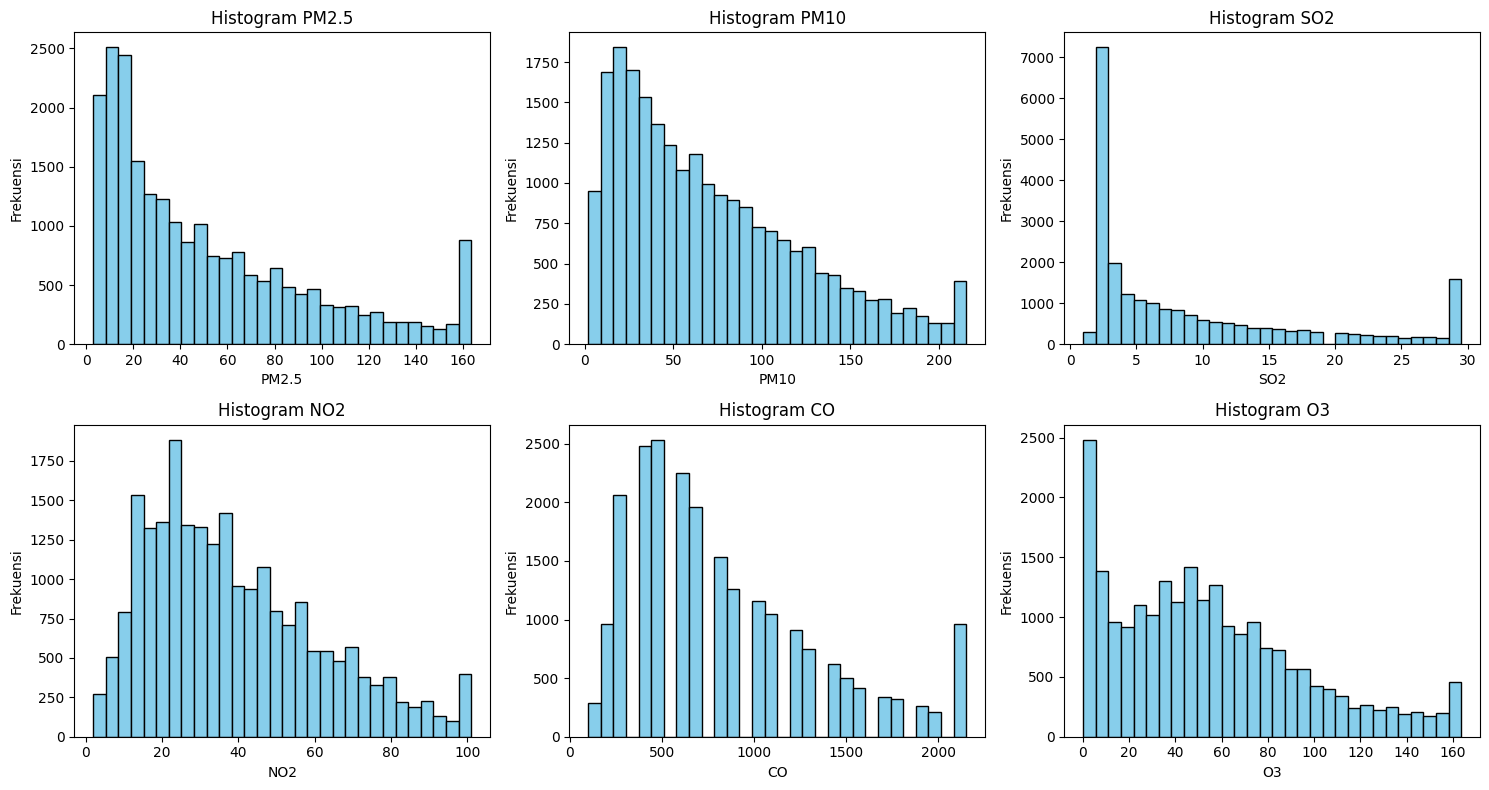

In [21]:
polutan = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
# Atur layout 3 kolom
n_cols = 3
n_rows = -(-len(polutan) // n_cols)  # pembulatan ke atas
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 8))
axs = axs.flatten()  # untuk akses 1D
for i, pollutant in enumerate(polutan):
    axs[i].hist(df_filtered[pollutant], bins=30, color='skyblue', edgecolor='black')
    axs[i].set_title(f'Histogram {pollutant}')
    axs[i].set_xlabel(pollutant)
    axs[i].set_ylabel('Frekuensi')

# Kosongkan subplot yang tidak terpakai (jika ada)
for j in range(len(polutan), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

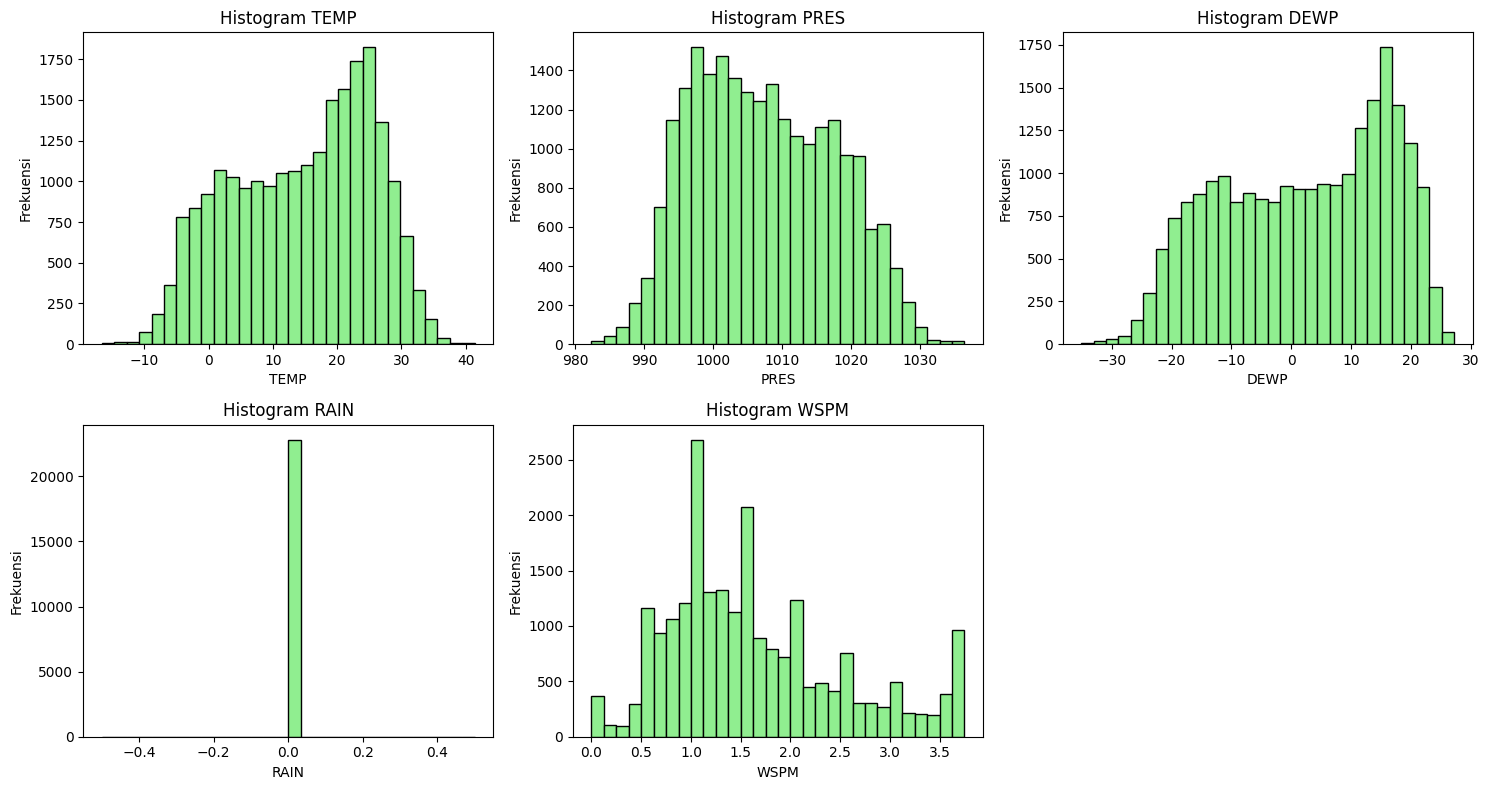

In [26]:
# Membuat histogram data cuaca
cuaca = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
# Atur layout 3 kolom
n_cols = 3
n_rows = -(-len(cuaca) // n_cols)  # pembulatan ke atas
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 8))
axs = axs.flatten()  # untuk akses 1D
for i, cuacas in enumerate(cuaca):
    axs[i].hist(df_filtered[cuacas], bins=30, color='lightgreen', edgecolor='black')
    axs[i].set_title(f'Histogram {cuacas}')
    axs[i].set_xlabel(cuacas)
    axs[i].set_ylabel('Frekuensi')
# Kosongkan subplot yang tidak terpakai (jika ada)
for j in range(len(cuaca), len(axs)):
    fig.delaxes(axs[j])
plt.tight_layout()
plt.show()

### Relationship

In [ ]:
# Membuat korelasi data polutan dan cuaca
kolom = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'WSPM','RAIN']
# Tabel korelasi
print("Tabel Korelasi")
df_filtered[kolom].corr()


Tabel Korelasi


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM,RAIN
PM2.5,1.000000,0.859526,0.280914,0.513472,0.726209,-0.025440,0.064554,-0.126500,0.285908,-0.254141,NaN
PM10,0.859526,1.000000,0.320177,0.565956,0.635514,0.000783,0.073653,-0.136036,0.189549,-0.182592,NaN
SO2,0.280914,0.320177,1.000000,0.375948,0.422495,-0.172077,-0.377987,0.316091,-0.398518,0.007185,NaN
NO2,0.513472,0.565956,0.375948,1.000000,0.643566,-0.505468,-0.250030,0.176667,-0.069375,-0.294534,NaN
CO,0.726209,0.635514,0.422495,0.643566,1.000000,-0.317603,-0.236510,0.150841,0.041356,-0.295156,NaN
O3,-0.025440,0.000783,-0.172077,-0.505468,-0.317603,1.000000,0.569726,-0.441485,0.306541,0.273193,NaN
TEMP,0.064554,0.073653,-0.377987,-0.250030,-0.236510,0.569726,1.000000,-0.839271,0.831582,0.002771,NaN
PRES,-0.126500,-0.136036,0.316091,0.176667,0.150841,-0.441485,-0.839271,1.000000,-0.777185,0.112330,NaN
DEWP,0.285908,0.189549,-0.398518,-0.069375,0.041356,0.306541,0.831582,-0.777185,1.000000,-0.289348,NaN
WSPM,-0.254141,-0.182592,0.007185,-0.294534,-0.295156,0.273193,0.002771,0.112330,-0.289348,1.000000,NaN



 Heatmap korelasi


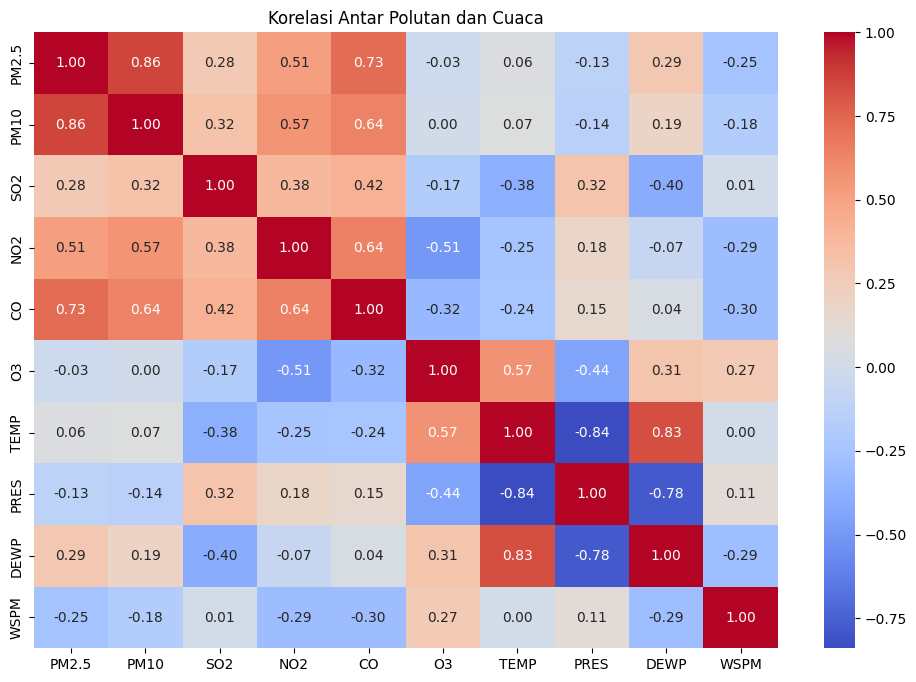

In [ ]:
# Cetak heatmap
print("\n Heatmap korelasi")
plt.figure(figsize=(12, 8))
sns.heatmap(df_filtered[kolom].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Polutan dan Cuaca')
plt.show()


In [ ]:
print("Tabel Covarian")
df_filtered[kolom].cov()

Tabel Covarian


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM
PM2.5,1868.742960,1926.813351,104.742861,500.561003,15924.117909,-44.904093,30.319704,-55.113647,169.947387,-9.704273
PM10,1926.813351,2689.127453,143.209788,661.841169,16716.650868,1.658070,41.497484,-71.097156,135.157883,-8.363757
SO2,104.742861,143.209788,74.396594,73.125702,1848.487927,-60.601881,-35.422509,27.477769,-47.264829,0.054744
NO2,500.561003,661.841169,73.125702,508.547356,7361.690975,-465.422074,-61.260962,40.152538,-21.511920,-5.866983
CO,15924.117909,16716.650868,1848.487927,7361.690975,257298.659172,-6577.966876,-1303.451724,771.135693,288.452679,-132.246544
O3,-44.904093,1.658070,-60.601881,-465.422074,-6577.966876,1667.153180,252.743486,-181.675336,172.103389,9.853058
TEMP,30.319704,41.497484,-35.422509,-61.260962,-1303.451724,252.743486,118.046182,-91.901155,124.235104,0.026597
PRES,-55.113647,-71.097156,27.477769,40.152538,771.135693,-181.675336,-91.901155,101.574673,-107.703632,1.000003
DEWP,169.947387,135.157883,-47.264829,-21.511920,288.452679,172.103389,124.235104,-107.703632,189.071589,-3.514367
WSPM,-9.704273,-8.363757,0.054744,-5.866983,-132.246544,9.853058,0.026597,1.000003,-3.514367,0.780239


### **Insight:**
- Polutan cenderung memiliki hubungan yang kuat dengan polutan lain
- Faktor cuaca cenderung memiliki hubungan yang kuat antar sesama faktor cuaca
- PM2.5 memiliki hubungan kuat dengan polutan lain seperti PM10, CO dan NO2, hal ini mungkin terjadi karena keduanya adalah partikel polutan yang sering muncul bersama.
- PM2.5 memiliki korelasi positif kuat dengan CO, ini mungkin karena CO dapat meningkatkan pembentukan PM2.5 melalui reaksi kimia di atmosfer.
- Untuk faktor cuaca, TEMP dan PRES berkorelasi negatif kuat yang berarti Suhu meningkat saat tekanan menurun


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren tahunan rata-rata konsentrasi PM2.5 di stasiun Changping dari tahun 2013 hingga 2017, dan apakah terdapat perbaikan kualitas udara selama periode tersebut?

In [36]:
def visual_line(df, kolom, skala):
    # kolom 'tanggal' format datetime
    df['tanggal'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
    # Set 'tanggal' sebagai index untuk resampling
    df.set_index('tanggal', inplace=True)
    # Lakukan resample sesuai skala (D = harian, M = bulanan, Y = tahunan)
    if skala == 'D':
        data = df.resample('D')[kolom].mean()
        title = f'Tren Harian {kolom}'
        xlabel = 'Hari'
    elif skala == 'M':
        data = df.resample('M')[kolom].mean()
        title = f'Tren Bulanan {kolom}'
        xlabel = 'Bulan'
    elif skala == 'Y':
        data = df.resample('Y')[kolom].mean()
        title = f'Tren Tahunan {kolom}'
        xlabel = 'Tahun'

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(data.index, data.values, marker='o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(f'Rata-rata {kolom}')
    plt.grid(True)
    plt.show()

<ipython-input-36-d8ecb872eaf3>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = df.resample('M')[kolom].mean()


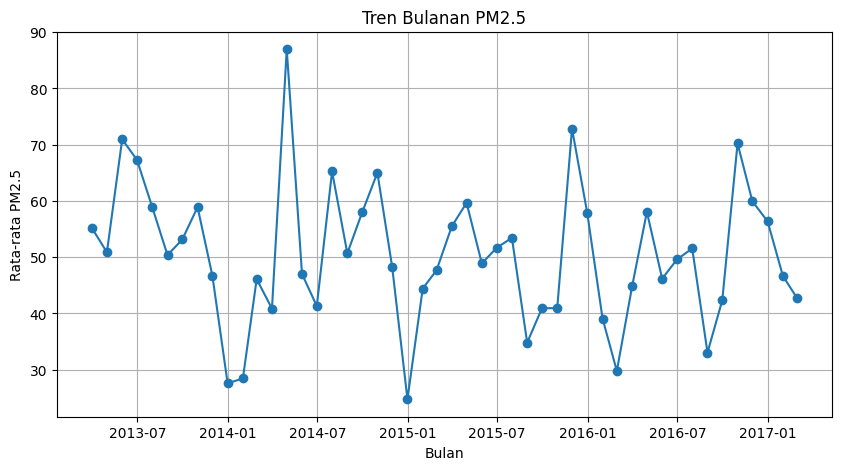

In [42]:
visual_line(df_filtered,'PM2.5','M')

<ipython-input-58-268df525aa34>:16: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  data = df.resample('Y')[kolom].mean()


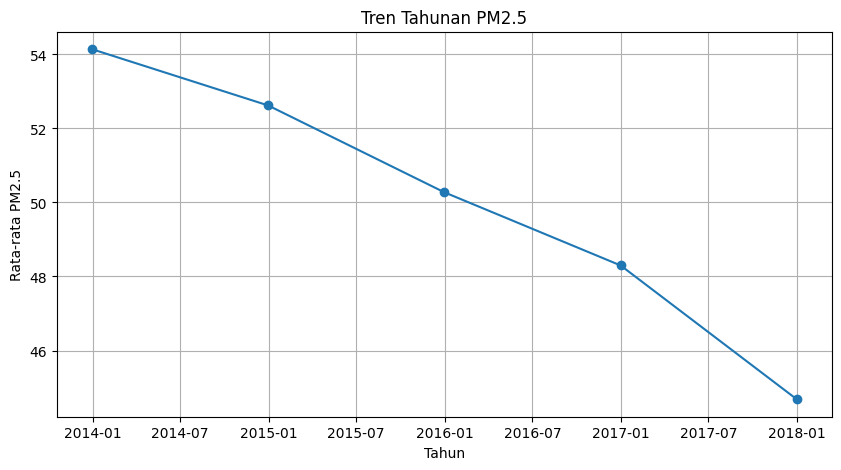

In [ ]:
visual_line(df_filtered,'PM2.5','Y')

#### Insight
- Berdasarkan grafik di atas, terlihat bahwa terjadi penurunan PM2.5 secara konstan di wilayah changping. Hal ini menandakan bahwa terjadi peningkatan kualitas udara dikarenakan konsentrasi polutan udara (PM2.5) yang terus menurun tiap tahunnya
- Secara bulanan, PM2.5 memiliki pola seperti mengalamai kenaikan saat juli-januari dan mengalami kenaikan saat januari-juli

### Pertanyaan 2 : Bagaimana konsentrasi Ozon (O3) setiap bulan di stasiun Changping selama periode 2013–2017?

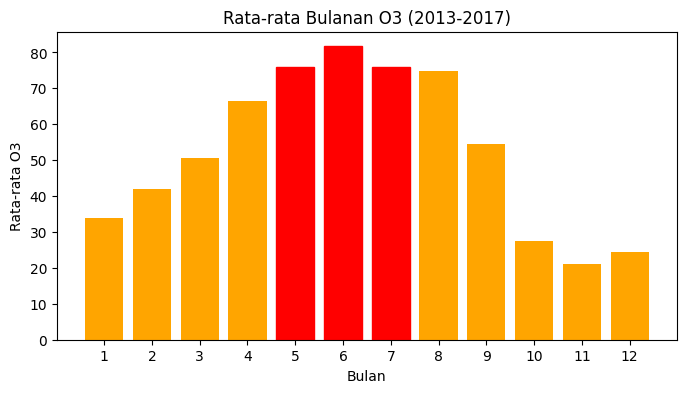

Bulan dengan O3 terbanyak


,O3
month,
6,81.687398
7,75.896849
5,75.821553


In [27]:
# Siapkan top3 bulan tertinggi
o3_monthly = df_filtered.groupby('month')['O3'].mean()
top3_months = o3_monthly.sort_values(ascending=False).head(3)

plt.figure(figsize=(8,4))
bars = plt.bar(o3_monthly.index, o3_monthly.values, color='orange')
plt.title('Rata-rata Bulanan O3 (2013-2017)')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata O3')
plt.xticks(range(1,13))

# Highlight top 3 bars
for i, bar in enumerate(bars):
    if o3_monthly.index[i] in top3_months.index:
        bar.set_color('red')

plt.show()

print("Bulan dengan O3 terbanyak")
top3_months

#### Insight
Berdasarkan rataaan perbulan dalam periode 2013-2017, intensitas O3 terus mengalami peningkatan setiap bulannya dan puncaknya adalah bulan Juni yang kemudian terus mengalami penurunan hingga bulan ke-11. Hal ini menandakan setelah bulan juni, kadar ozon terus mengalami penurunan. Mei hingga Juli adalah ketika ozon memiliki intensitas tertinggi dalam setahun.

### Pertanyaan 3 : Seberapa kuat hubungan antara suhu udara (TEMP) dan konsentrasi ozon (O3) di stasiun Changping selama 2013–2017?

Korelasi antara temperatur dan ozon adalah 
 0.57


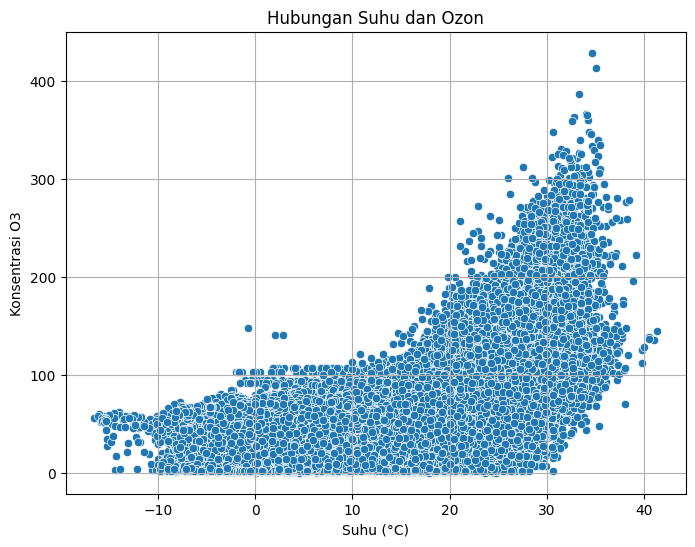

In [ ]:
# Plot hubungan suhu dan ozon
cor = round(df_filtered[['TEMP', 'O3']].corr().loc['TEMP', 'O3'],2)
print("Korelasi antara temperatur dan ozon adalah \n", cor)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='TEMP', y='O3')
plt.title('Hubungan Suhu dan Ozon')
plt.xlabel('Suhu (°C)')
plt.ylabel('Konsentrasi O3')
plt.grid(True)
plt.show()

#### Insight
- Berdasarkan tabel korelasi sebelumnya, faktor polutan dan faktor cuaca tidak memiliki korelasi yang signifikan, namun pada ozon dan temperatur. terlihat memiliki korelasi positif lemah karena faktanya ozon memang  terbentuk lebih banyak pada suhu tinggi

### Conclusion
1. Terjadi Penurunan PM2.5 Tahunan (2013–2015)
Selama periode 2013 hingga 2015, konsentrasi rata-rata PM2.5 di wilayah Changping menunjukkan tren penurunan yang konsisten setiap tahunnya. Hal ini menandakan peningkatan kualitas udara secara umum, yang dapat disebabkan oleh kebijakan pengendalian emisi dan pengurangan aktivitas polutan.
2. Pola Musiman PM2.5
Secara bulanan, PM2.5 cenderung meningkat pada pertengahan hingga akhir tahun (Juli–Januari) dan menurun dari Januari hingga pertengahan tahun (sekitar Juli). Hal ini mengindikasikan adanya pengaruh musiman terhadap kualitas udara, kemungkinan berkaitan dengan pola cuaca kering dan meningkatnya penggunaan pemanas atau aktivitas industri saat musim dingin.
3. Hubungan Lemah antara Faktor Cuaca dan Polutan Kecuali Ozon
Hasil korelasi menunjukkan bahwa sebagian besar variabel cuaca (seperti tekanan udara, kelembaban, hujan) tidak memiliki hubungan yang signifikan dengan polutan udara. Namun, terdapat korelasi positif lemah (0.57) antara temperatur dan ozon, mendukung fakta ilmiah bahwa ozon lebih mudah terbentuk pada suhu tinggi akibat reaksi fotokimia.
4. Puncak Ozon Terjadi pada Bulan Mei–Juli
Rata-rata konsentrasi O3 menunjukkan pola musiman yang jelas, dengan peningkatan bertahap sejak awal tahun hingga mencapai puncaknya pada bulan Juni (81 µg/m³), kemudian menurun setelahnya. Ini konsisten dengan musim panas di Beijing yang cenderung meningkatkan produksi ozon permukaan akibat radiasi UV yang tinggi.

## Rekomendasi

1. Evaluasi dan Pertahankan Kebijakan Pengendalian Emisi: Penurunan PM2.5 dari 2013–2015 menunjukkan bahwa intervensi yang dilakukan berdampak positif. Pemerintah setempat disarankan untuk mempertahankan dan memperkuat kebijakan seperti pengawasan industri, pembatasan kendaraan, dan promosi energi bersih.
2. Peningkatan Sistem Pemantauan Musiman: Karena terdapat lonjakan PM2.5 pada paruh kedua tahun dan peningkatan O3 pada pertengahan tahun, sistem pemantauan kualitas udara perlu dioptimalkan pada periode tersebut untuk memberikan peringatan dini kepada masyarakat.
3. Sosialisasi Kesehatan pada Periode Risiko Tinggi: Kampanye publik perlu difokuskan pada bulan-bulan ketika kualitas udara cenderung buruk (PM2.5 tinggi di musim dingin, O3 tinggi di musim panas), agar masyarakat lebih waspada dan dapat mengambil tindakan pencegahan, seperti mengurangi aktivitas luar ruangan atau menggunakan masker.
4. Pemantauan Intensif Ozon saat Suhu Tinggi
Karena ozon cenderung meningkat pada suhu tinggi akibat reaksi fotokimia, disarankan untuk meningkatkan frekuensi pemantauan kualitas udara—khususnya konsentrasi O₃—selama musim panas atau saat suhu melonjak. Ini penting untuk mencegah paparan berlebih terhadap ozon, terutama bagi kelompok rentan (anak-anak, lansia, penderita asma).